# 0. Header

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.optimize as so


lr = 0.05
epoch = 200
eps = 0.01
t = np.linspace(0, 10, 1000)
s = np.linspace(0, 10, 1000)
X, Y = np.meshgrid(t, s)


def gradient_descent_base(f, start_pos, search_algo, max_count=epoch, draw=True):
    x, i = start_pos, 0
    points = np.zeros((max_count, len(start_pos)))
    points[i] = x
    for i in range(1, max_count):
        p = search_algo(f, x)
        if np.linalg.norm(x - p, 2) < eps:
            points.resize([i, 2], refcheck=False)
            break
        x = p
        points[i] = x
    if draw:
        plt.plot(points[:, 0], points[:, 1], 'o-')
        plt.contour(X, Y, f([X, Y]), levels=sorted([f([p[0], p[1]]) for p in points]))
        plt.show()
    return [x, i + 1]


# Задание 1. Градиентный спуск с постоянным шагом

In [ ]:

def gradient_simple(f, pos):
    arr = np.array([0] * len(pos), float)
    start = f(pos)
    for i in range(len(pos)):
        pos[i] += eps
        arr[i] = (f(pos) - start) / eps
        pos[i] -= eps
    return arr


def gradient_advanced(f, pos):
    arr = np.array([0] * len(pos), float)
    for i in range(len(pos)):
        pos[i] += eps
        arr[i] = f(pos)
        pos[i] -= 2 * eps
        arr[i] = (arr[i] - f(pos)) / (2 * eps)
        pos[i] += eps
    return arr


def gradient_descent(f, start_pos):
    return gradient_descent_base(
        f, start_pos,
        lambda g, x : x - lr * np.array(gradient_simple(g, x)))


# Задание 2. Метод одномерного поиска (метод дихотомии) и градиентный спуск на его основе

In [ ]:

def dichotomy(f, pos, dir):
    r = lr
    mn = f(pos)
    while True:
        tmp = f(pos + dir * r)
        if tmp >= mn:
            break
        mn = tmp
        r *= 2
    l = 0
    for _ in range(20):
        m = (r + l) / 2
        if f(pos + (m + eps) * dir) > f(pos + (m - eps) * dir):
            r = m
        else:
            l = m
    return pos + l * dir


def gradient_descent_advanced(f, start_pos):
    return gradient_descent_base(
        f, start_pos,
        lambda g, x : dichotomy(g, x, -gradient_advanced(g, x)))


# Задания 3-4. Примеры работы для квадратичных функций

## Пример 1

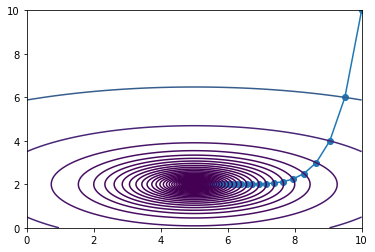

[array([5.08633126, 1.995     ]), 40]


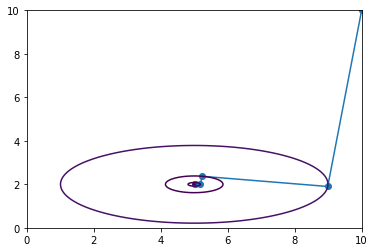

[array([5.00852023, 1.99978703]), 7]


In [ ]:

def f1(x):
    return (x[0] - 5) ** 2 + 5 * (x[1] - 2) ** 2


print(gradient_descent(f1, np.array([10, 10], float)))
print(gradient_descent_advanced(f1, np.array([10, 10], float)))


## Пример 2

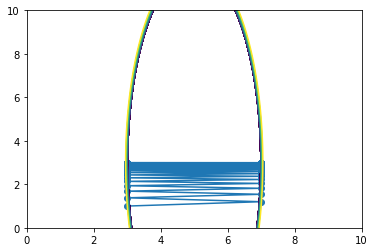

[array([6.99 , 2.995]), 200]


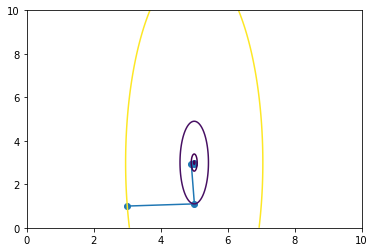

[array([4.99631819, 2.99632412]), 6]


In [ ]:

def f2(x):
    return 20 * (x[0] - 5) ** 2 + (x[1] - 3) ** 2


print(gradient_descent(f2, np.array([3., 1.], float)))
print(gradient_descent_advanced(f2, np.array([3., 1.], float)))


## Пример 3

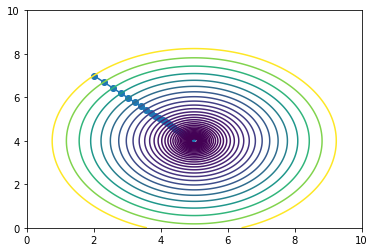

[array([4.92752744, 4.06269784]), 38]


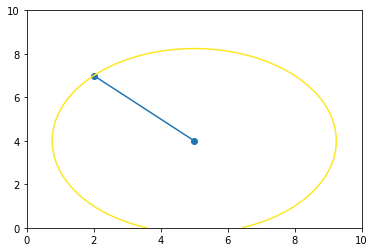

[array([5., 4.]), 3]


In [ ]:

def f3(x):
    return (x[0] - 5) ** 2 + (x[1] - 4) ** 2


print(gradient_descent(f3, np.array([2, 7], float)))
print(gradient_descent_advanced(f3, np.array([2, 7], float)))


# Задание 5. Генератор функций

Генерирует случайную квадратичную функцию `n` переменных с числом обусловленности `k`.

In [ ]:

def generate_function(n: int, k: float):
    values = [random.uniform(1.0, k) for _ in range(n - 2)]
    values.extend([1.0, k])
    values.sort()
    d = np.diag(values)
    m = np.random.rand(n, n)
    q, _ = np.linalg.qr(m)
    m = np.matmul(np.matmul(q, d), np.transpose(q))
    return [lambda x : x @ m @ x,
            lambda f, x : dichotomy(f, x, np.diag(np.full(n, -2)) @ m @ x)]


# Задания 6-7. Исследование зависимости числа итераций T(n, k)

2 1 3.0
2 101 11.4
2 201 8.0
2 301 7.8
2 401 12.2
2 501 7.2
2 601 59.8
2 701 8.2
2 801 8.2
2 901 9.5
3 1 3.0
3 101 137.4
3 201 243.4
3 301 308.0
3 401 314.6
3 501 413.7
3 601 487.4
3 701 430.7
3 801 383.3
3 901 505.4
7 1 3.0
7 101 199.5
7 201 324.1
7 301 436.4
7 401 530.6
7 501 613.7
7 601 691.0
7 701 699.0
7 801 790.5
7 901 849.8
15 1 3.0
15 101 226.8
15 201 382.1
15 301 495.5
15 401 625.6
15 501 709.0
15 601 794.1
15 701 884.0
15 801 936.8
15 901 1018.2
30 1 3.0
30 101 246.4
30 201 416.4
30 301 559.1
30 401 692.5
30 501 807.9
30 601 925.9
30 701 1004.6
30 801 1100.8
30 901 1202.0


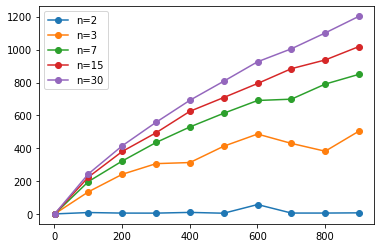

In [ ]:

test_count = 10

def T(n: int, k: float):
    sum = 0
    for _ in range(test_count):
        fs = generate_function(n, k)
        sum += gradient_descent_base(
            fs[0],
            [10] * n,
            fs[1],
            max_count=2000, draw=False)[1]
    print(n, k, sum / test_count)
    return sum / test_count

ax_k = np.arange(1, 1001, 100)

for n in [2, 3, 7, 15, 30]:
    plt.plot(ax_k, [T(n, k) for k in ax_k], '-o', label='n='+str(n))

plt.legend()
plt.show()
